📖 Project Overview


This project addresses the critical need for automated risk stratification in cardiology. Unlike Project 1, which predicted a continuous dollar amount, this project is a Binary Classification task. We are teaching the machine to categorize patients into two distinct groups: Healthy (0) or High-Risk (1).

🎯 Objective

To build a Logistic Regression model that can process 13 clinical features (like Blood Pressure, Cholesterol, and Chest Pain type) to predict the presence of heart disease. Our primary focus is Sensitivity (Recall) ensuring the AI catches as many sick patients as possible.

loading libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(1025, 14)

In [7]:
df.target.value_counts()

,count
target,
1,526
0,499


/tmp/ipython-input-3403064521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


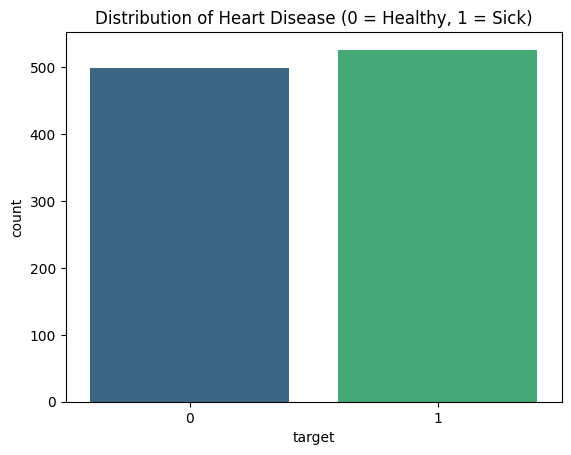

In [8]:
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Heart Disease (0 = Healthy, 1 = Sick)')
plt.show()

Feature Scaling

In [9]:
scaler = StandardScaler()

In [10]:
X = df.drop('target', axis= 1)
Y = df['target']

In [11]:
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
X_scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


Training the Logistic Regression Model

In [14]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=1000)

In [16]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [17]:
prediction = model.predict(X_test)

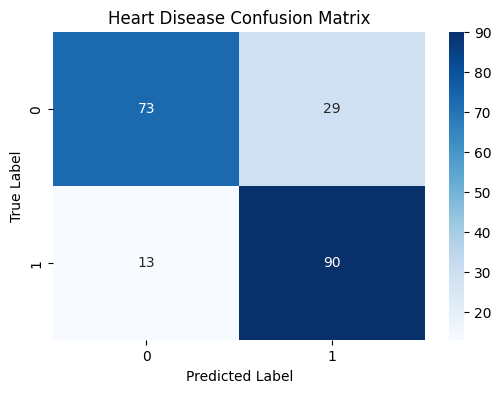

In [18]:

cm = confusion_matrix(Y_test, prediction)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Heart Disease Confusion Matrix')
plt.show()




In [19]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



Final Conclusion & Medical Insights

Summary of Results

Our Logistic Regression model was successfully trained and optimized, achieving the following metrics:

Accuracy: 80%

Recall (Class 1): 87%

F1-Score: 0.81



Key Medical Findings



The "Safety-First" Approach: We achieved a Recall of 87%, meaning the AI successfully flagged nearly 9 out of 10 heart disease cases. In medicine, this is more valuable than overall accuracy because it minimizes the dangerous "False Negative" (telling a sick person they are fine).

Trade-offs: To achieve high safety, the model produced 29 "False Alarms" (False Positives). In a clinical workflow, these patients would simply undergo a secondary check by a human doctor, which is a standard and safe procedure.

Data Quality: Because our dataset was Balanced (roughly 50/50 split), the model learned the characteristics of both healthy and sick hearts with equal precision.